In [176]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import fractions as fract

%matplotlib notebook

In [314]:
# Fast modular exponentiation
def powmod(base, exponent, modulus):
    n_out = 1
    while exponent:
        if exponent & 1:
            n_out = n_out * base % modulus
        exponent >>= 1
        base = base * base % modulus
    return n_out

# Vectorised modular exponentiation
vpowmod = np.vectorize(powmod)

# Calculates the period of the field
def period(N, a):
    for i in range(1,N):
        if powmod(a, i, N) == 1:
            return i

In [318]:
def factor(semiPrime):
    factored = False
    while not factored:
        #Pick a random number in the range 1 to the semiprime
        a = int(np.random.random() * (semiPrime - 1)) 
        # If the number shares a common divisor with the semiprime then we have finished
        if fract.gcd(a, semiPrime) != 1:
            factor = fract.gcd(a, semiPrime)
            factored = True
            return int(factor), int(semiPrime/factor)
        else:
            # Calculate the period of the integer field generated by a and the semi-prime
            # This bit gets replaced by the quantum period finding algorithm
            r = int(period(semiPrime, a))
            # If the period is not a factor of 2 then we try again
            if r % 2 == 0:
                # Ensure that the number is not the square of the semiprime
                if powmod(int(a), int(r/2), int(semiPrime)) != 0:
                    # The factor can be found by the element of the ring +1
                    factor = fract.gcd(a**int(r/2) + 1, semiPrime)
                    # Check that the factor found is non-trivial (i.e. not 1 or the semiprime)
                    if factor != 1 and factor != semiPrime:
                        # We're done
                        return int(fract.gcd(a**int(r/2) + 1, semiPrime)), int(fract.gcd(a**int(r/2) - 1, semiPrime))
                        factored = True

In [379]:
primeA = 23
primeB = 17
semiPrime = primeA * primeB

In [380]:
factor(semiPrime)

(17, 23)

<IPython.core.display.Javascript object>


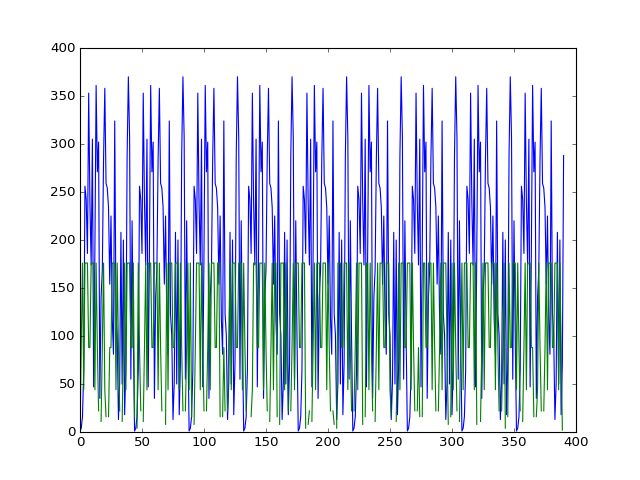

In [381]:
base = 4
dataset = np.array(map(lambda exponent: int(vpowmod(base, exponent, semiPrime)), range(semiPrime)))
plt.plot(dataset)

In [382]:
dataset = np.array(map(lambda base: period(semiPrime, int(base)), range(1,semiPrime)))

In [383]:
plt.plot(dataset)